In [251]:
# Primeiro, precisamos instalar algumas bibliotecas necessárias
#!pip install nltk gensim pyLDAvis

# Em seguida, precisamos importar as bibliotecas
import nltk
import gensim
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from imp import reload 
from pprint import pprint

# Vamos começar baixando alguns dados de exemplo do nltk
nltk.download('brown')

# Em seguida, precisamos pré-processar os dados para remover stopwords e outras etapas de pré-processamento
from nltk.corpus import brown
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

stop_words = stopwords.words('english')

def preprocess(text):
  text = ' '.join(text) # junte as palavras em uma string
  text = [word for word in simple_preprocess(text) if word not in stop_words] # remova stopwords
  return text


# Aplique o pré-processamento aos documentos do corpus brown
corpus = [preprocess(doc) for doc in brown.sents()]

# Em seguida, vamos criar um dicionário de palavras a partir do corpus
dictionary = gensim.corpora.Dictionary(corpus)

# Em seguida, vamos criar o corpus em formato bag-of-words
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

# Agora, podemos treinar o modelo LDA
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=5)

# Também podemos plotar os tópicos gerados pelo modelo LDA usando matplotlib
topics = lda_model.show_topics(num_words=10, formatted=False)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]


[nltk_data] Error loading brown: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


[(0,
  '0.010*"body" + 0.010*"dark" + 0.009*"done" + 0.008*"dead" + 0.006*"job" + '
  '0.006*"many" + 0.006*"fact" + 0.005*"captain" + 0.005*"someone" + '
  '0.005*"attention"'),
 (1,
  '0.016*"one" + 0.014*"years" + 0.013*"asked" + 0.013*"nothing" + 0.012*"two" '
  '+ 0.010*"would" + 0.007*"boy" + 0.007*"five" + 0.007*"anything" + '
  '0.006*"could"'),
 (2,
  '0.020*"went" + 0.017*"something" + 0.017*"mr" + 0.016*"room" + 0.014*"hand" '
  '+ 0.010*"said" + 0.010*"girl" + 0.009*"mrs" + 0.009*"stood" + 0.008*"man"'),
 (3,
  '0.020*"eyes" + 0.016*"knew" + 0.015*"little" + 0.013*"never" + 0.011*"even" '
  '+ 0.010*"well" + 0.010*"voice" + 0.009*"sure" + 0.008*"sat" + '
  '0.008*"really"'),
 (4,
  '0.013*"like" + 0.013*"back" + 0.012*"one" + 0.012*"see" + 0.011*"go" + '
  '0.011*"long" + 0.010*"said" + 0.010*"away" + 0.010*"got" + 0.010*"time"'),
 (5,
  '0.023*"looked" + 0.018*"felt" + 0.010*"upon" + 0.010*"state" + '
  '0.008*"sound" + 0.007*"mike" + 0.007*"business" + 0.006*"important" +

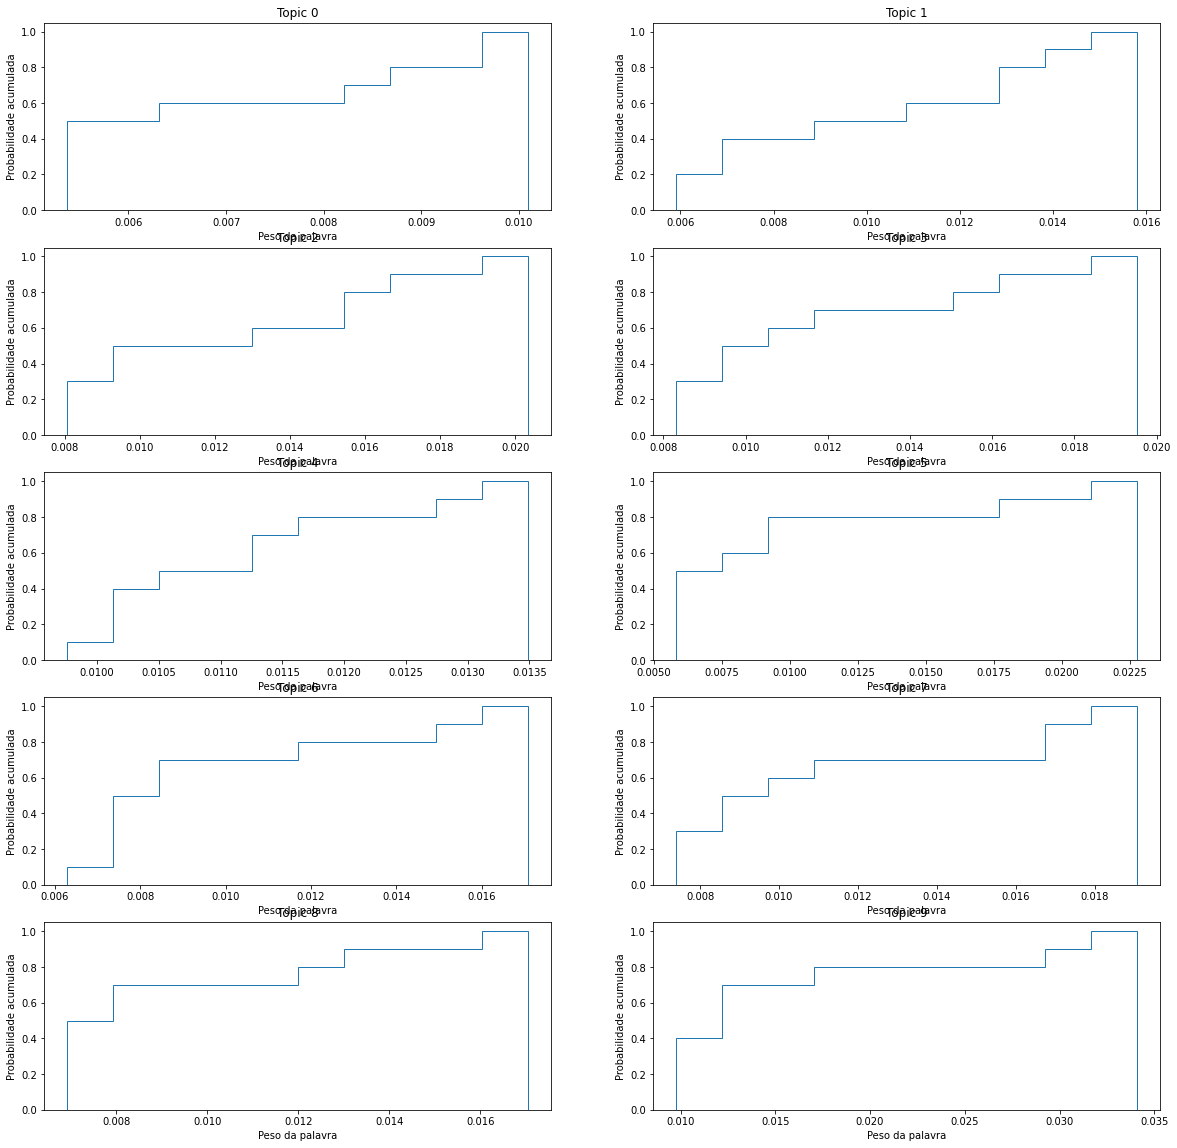

In [252]:
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista chamada "topics" com os tópicos modelados pelo LDA
# e que cada elemento da lista é uma tupla (topic_id, words_and_weights), onde
# words_and_weights é uma lista de tuplas (word, weight)

# Cria o objeto "figura" com 2 colunas e 5 linhas
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i, topic in enumerate(topics):
    words = [word[0] for word in topic[1]]
    weights = [word[1] for word in topic[1]]
    
    # Obtém o índice da linha e da coluna para plotar o gráfico
    row = i // 2
    col = i % 2
    
    # Plota o gráfico da distribuição normal no eixo correspondente
    ax = axs[row, col]
    ax.hist(weights, density=True, histtype='step', cumulative=True, label='Empírico')
    ax.set_title('Topic {}'.format(topic[0]))
    ax.set_xlabel('Peso da palavra')
    ax.set_ylabel('Probabilidade acumulada')

# Mostra todos os gráficos


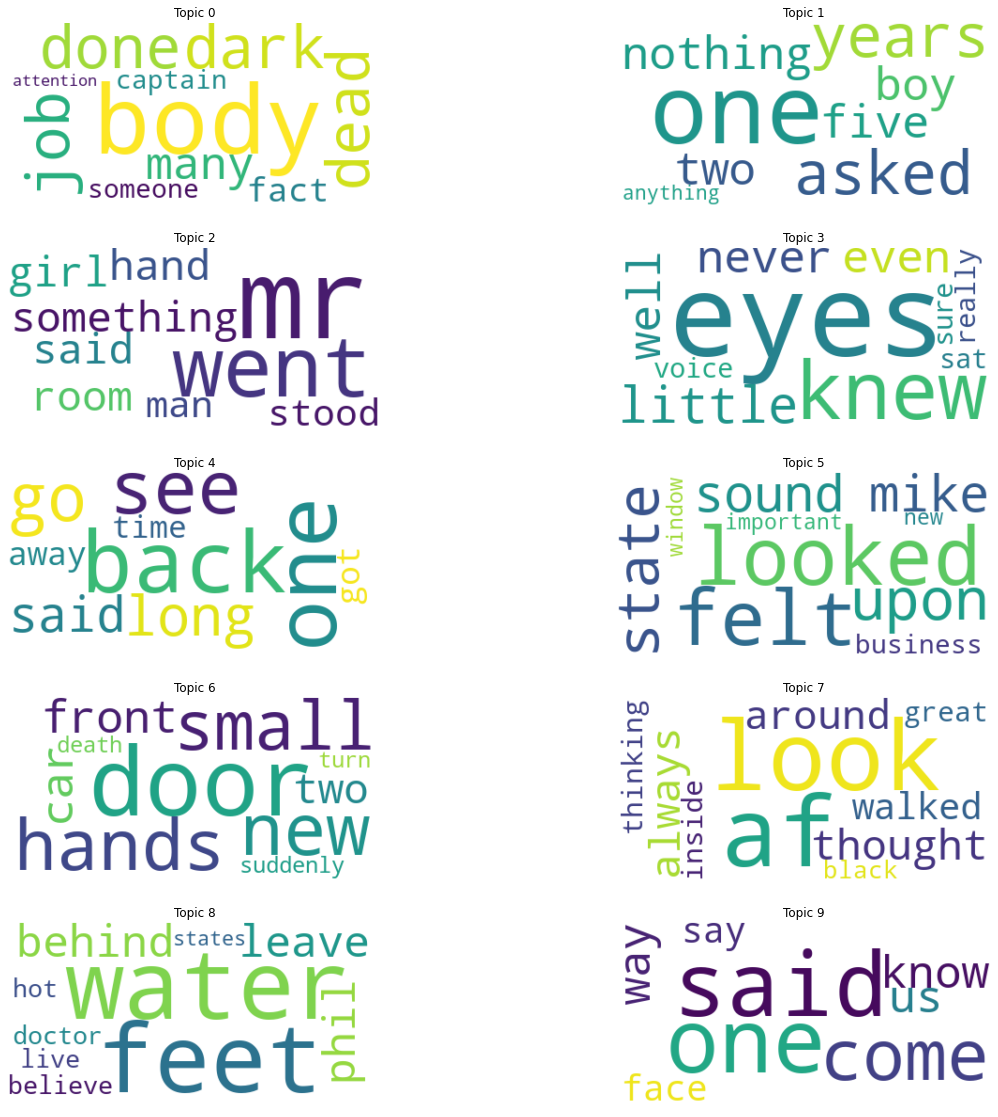

In [253]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Suponha que você tenha uma lista chamada "topics" com os tópicos modelados pelo LDA
# e que cada elemento da lista é uma tupla (topic_id, words_and_weights), onde
# words_and_weights é uma lista de tuplas (word, weight)

# Cria o objeto "figura" com 2 colunas e 5 linhas
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i, topic in enumerate(topics):
    words_and_weights = topic[1]
    text = " ".join([word for word, weight in words_and_weights])
    
    # Gera a nuvem de palavras
    wordcloud = WordCloud(background_color='white').generate(text)
    
    # Obtém o índice da linha e da coluna para plotar o gráfico
    row = i // 2
    col = i % 2
    
    # Plota a nuvem de palavras no eixo correspondente
    ax = axs[row, col]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title('Topic {}'.format(topic[0]))

# Mostra todos os gráficos
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/pytho

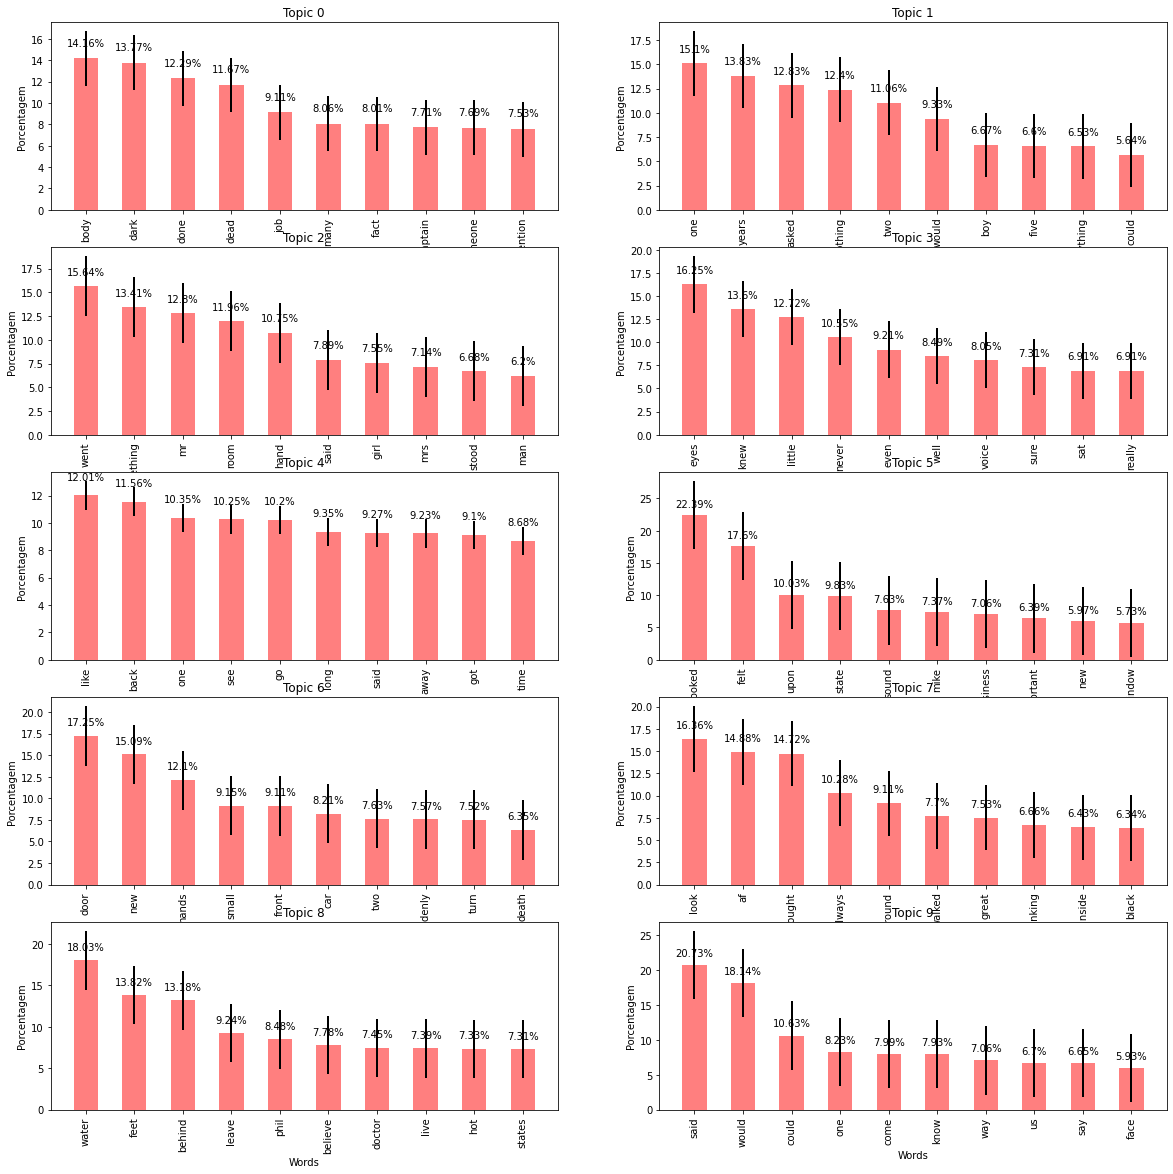

In [254]:
import matplotlib.pyplot as plt
import numpy as np

# Suponha que você tenha uma lista chamada "topics" com os tópicos modelados pelo LDA
# e que cada elemento da lista é uma tupla (topic_id, words_and_weights), onde
# words_and_weights é uma lista de tuplas (word, weight)

# Cria o objeto "figura" com 2 colunas e 5 linhas
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i, topic in enumerate(topics):
    words = [word[0] for word in topic[1]]
    weights = [word[1] for word in topic[1]]
    total_weight = sum(weights)
    percentages = [round(weight/total_weight*100,2) for weight in weights]
    
    # Calcula o desvio padrão da amostra
    std = np.std(percentages)
    
    # Obtém o índice da linha e da coluna para plotar o gráfico
    row = i // 2
    col = i % 2
    
    # Plota o gráfico no eixo correspondente
    ax = axs[row, col]
    ax.bar(words, percentages, width=0.5, color='r', alpha=0.5, align='center', edgecolor='none')
    ax.errorbar(words, percentages, yerr=std, fmt='none', ecolor='black', elinewidth=2)
    ax.set_xticklabels(words, rotation=90)
    ax.set_title('Topic {}'.format(topic[0]))
    ax.set_xlabel('Words')
    ax.set_ylabel('Porcentagem')
    
    # Adiciona os percentuais com duas casas decimais a cada barra do gráfico
    for bar, percentage in zip(ax.patches, percentages):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, '{}%'.format(percentage), ha='center', va='bottom')

# Mostra todos os gráficos
plt.show()


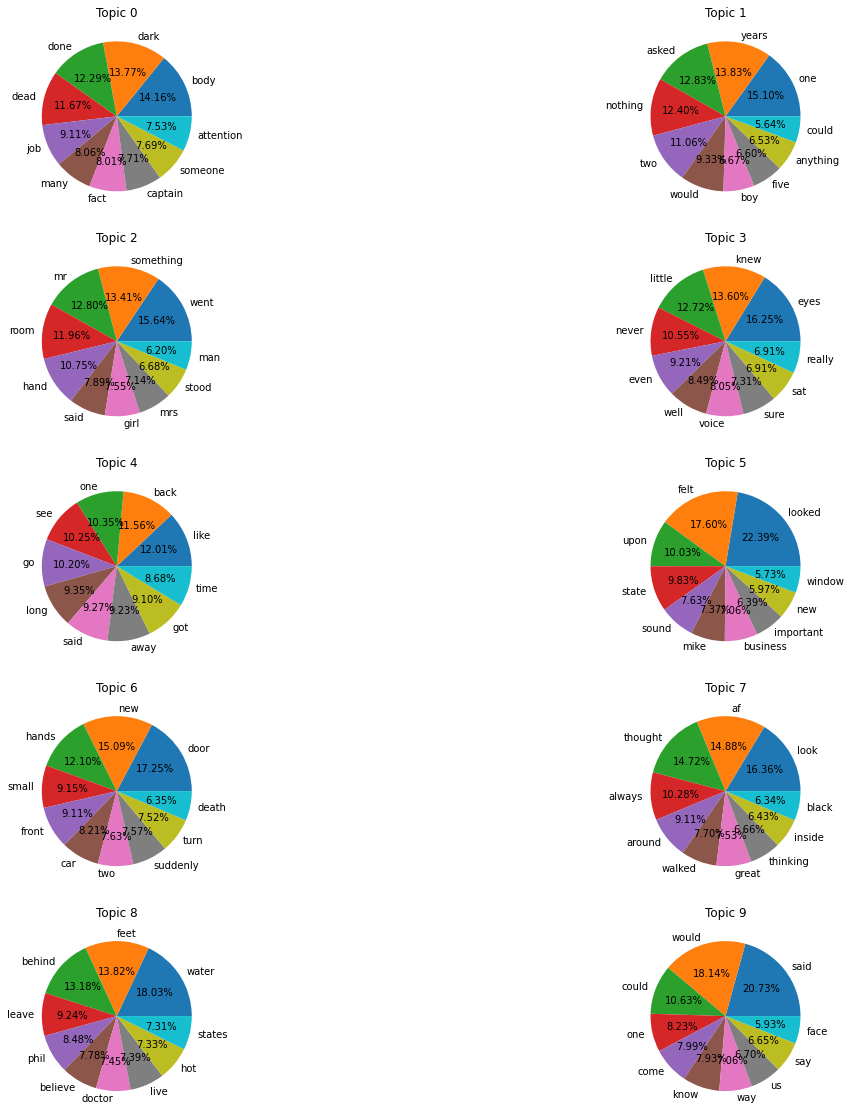

In [255]:
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista chamada "topics" com os tópicos modelados pelo LDA
# e que cada elemento da lista é uma tupla (topic_id, words_and_weights), onde
# words_and_weights é uma lista de tuplas (word, weight)

# Cria o objeto "figura" com 2 colunas e 5 linhas
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i, topic in enumerate(topics):
    words = [word[0] for word in topic[1]]
    weights = [word[1] for word in topic[1]]
    total_weight = sum(weights)
    percentages = [round(weight/total_weight*100,2) for weight in weights]
    
    # Obtém o índice da linha e da coluna para plotar o gráfico
    row = i // 2
    col = i % 2
    
    # Plota o gráfico de pizza no eixo correspondente
    ax = axs[row, col]
    ax.pie(percentages, labels=words, autopct='%1.2f%%')
    ax.set_title('Topic {}'.format(topic[0]))

# Mostra todos os gráficos
plt.show()


In [256]:
import pandas as pd

# Extract the top 20 phrases for each topic
top_phrases = []
for topic_id, topic in topics:
    top_words = [word[0] for word in topic]
    top_phrases.append(top_words[:20])

# Create a DataFrame from the list of top phrases
df = pd.DataFrame(top_phrases)

# Print the DataFrame
print(df)


        0          1        2        3       4        5         6          7  \
0    body       dark     done     dead     job     many      fact    captain   
1     one      years    asked  nothing     two    would       boy       five   
2    went  something       mr     room    hand     said      girl        mrs   
3    eyes       knew   little    never    even     well     voice       sure   
4    like       back      one      see      go     long      said       away   
5  looked       felt     upon    state   sound     mike  business  important   
6    door        new    hands    small   front      car       two   suddenly   
7    look         af  thought   always  around   walked     great   thinking   
8   water       feet   behind    leave    phil  believe    doctor       live   
9    said      would    could      one    come     know       way         us   

          8          9  
0   someone  attention  
1  anything      could  
2     stood        man  
3       sat     rea

In [257]:
import pandas as pd

# Extract the top 20 phrases for each topic
top_phrases = []
for topic_id, topic in topics:
    top_words = [word[0] for word in topic]
    top_phrases.append(top_words[:20])

# Create a DataFrame from the list of top phrases
df = pd.DataFrame(top_phrases)

# Organize the words into coherent phrases for each topic
phrases = []
for i in range(df.shape[0]):
    phrase = " ".join(df.iloc[i])
    phrases.append(phrase)

# Create a new DataFrame with the phrases and their associated topics
topic_df = pd.DataFrame({'Topic': range(1, df.shape[0] + 1), 'Phrase': phrases})

# Print the DataFrame
print(topic_df)


   Topic                                             Phrase
0      1  body dark done dead job many fact captain some...
1      2  one years asked nothing two would boy five any...
2      3  went something mr room hand said girl mrs stoo...
3      4  eyes knew little never even well voice sure sa...
4      5       like back one see go long said away got time
5      6  looked felt upon state sound mike business imp...
6      7  door new hands small front car two suddenly tu...
7      8  look af thought always around walked great thi...
8      9  water feet behind leave phil believe doctor li...
9     10     said would could one come know way us say face


Coherence scores:  [0.4817861301455988, 0.2082663201485703, 0.22262792073213133, 0.2421381945651711, 0.20422209517727272, 0.42078924467993106, 0.2001469784127204, 0.40161847968379627, 0.4645329156352386, 0.2579375818656231]


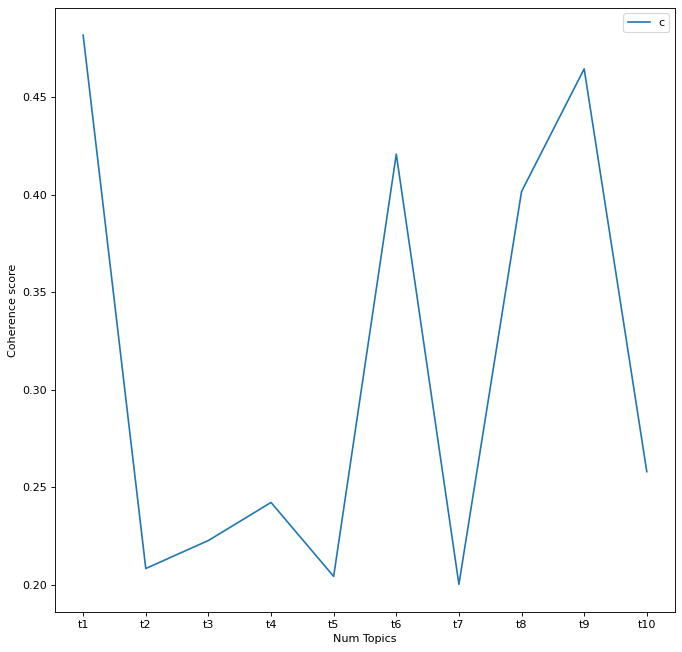

In [258]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_ldas = coherence_model_lda.get_coherence_per_topic()
print('Coherence scores: ', coherence_ldas)

import matplotlib.pyplot as plt
import numpy as np
topicsname=[]
for i in range(1,10+1):
    topicsname.append("t{0}".format(i))
topicsname

from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

plt.plot(topicsname,coherence_ldas)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
import warnings

# Suppress the DeprecationWarning message
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here



In [259]:
from gensim.models.coherencemodel import CoherenceModel

# Create the CoherenceModel object
coherence_model = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')

# Calculate the coherence of each topic
coherence_scores = coherence_model.get_coherence_per_topic()

# Zip the coherence scores and the topic indices
topics = zip(coherence_scores, range(len(coherence_scores)))

# Sort the topics by coherence score
sorted_topics = sorted(topics, key=lambda x: x[0], reverse=True)

# Print the most coherent topics and their coherence scores
for topic in sorted_topics[:10]:
    print(f"Topic {topic[1]}: {topic[0]:.3f}")


Topic 0: 0.482
Topic 8: 0.465
Topic 5: 0.421
Topic 7: 0.402
Topic 9: 0.258
Topic 3: 0.242
Topic 2: 0.223
Topic 1: 0.208
Topic 4: 0.204
Topic 6: 0.200


In [260]:
# Get the top words for each topic
top_words = lda_model.show_topics(num_topics=10, num_words=10)

# Print the top words for each topic
for topic in top_words:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.010*"body" + 0.010*"dark" + 0.009*"done" + 0.008*"dead" + 0.006*"job" + 0.006*"many" + 0.006*"fact" + 0.005*"captain" + 0.005*"someone" + 0.005*"attention"
Topic 1: 0.016*"one" + 0.014*"years" + 0.013*"asked" + 0.013*"nothing" + 0.012*"two" + 0.010*"would" + 0.007*"boy" + 0.007*"five" + 0.007*"anything" + 0.006*"could"
Topic 2: 0.020*"went" + 0.017*"something" + 0.017*"mr" + 0.016*"room" + 0.014*"hand" + 0.010*"said" + 0.010*"girl" + 0.009*"mrs" + 0.009*"stood" + 0.008*"man"
Topic 3: 0.020*"eyes" + 0.016*"knew" + 0.015*"little" + 0.013*"never" + 0.011*"even" + 0.010*"well" + 0.010*"voice" + 0.009*"sure" + 0.008*"sat" + 0.008*"really"
Topic 4: 0.013*"like" + 0.013*"back" + 0.012*"one" + 0.012*"see" + 0.011*"go" + 0.011*"long" + 0.010*"said" + 0.010*"away" + 0.010*"got" + 0.010*"time"
Topic 5: 0.023*"looked" + 0.018*"felt" + 0.010*"upon" + 0.010*"state" + 0.008*"sound" + 0.007*"mike" + 0.007*"business" + 0.006*"important" + 0.006*"new" + 0.006*"window"
Topic 6: 0.017*"door" + 

In [261]:
#! pip install --upgrade gensim

In [262]:
# Vamos visualizar os tópicos gerados pelo modelo LDA
from imp import reload 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

vis

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.172362 -0.153589       1        1  13.094252
4      0.221542 -0.025454       2        1  12.739115
5     -0.197787 -0.161317       3        1  11.609171
1      0.146304 -0.039261       4        1  10.738578
3      0.043194 -0.094845       5        1   9.948685
2      0.071015  0.178168       6        1   9.563442
0     -0.171060 -0.109421       7        1   8.833642
6     -0.023251  0.147157       8        1   8.542244
8     -0.199744  0.012559       9        1   7.882369
7     -0.062575  0.246004      10        1   7.048503, topic_info=            Term         Freq        Total Category  logprob  loglift
14          said  3954.000000  3954.000000  Default  30.0000  30.0000
1969      looked  1404.000000  1404.000000  Default  29.0000  29.0000
322        would  3587.000000  3587.000000  Default  28.0000  28.0000
661         went  1034.000000  1034.000000  Default  27.0000  27.0000
3134        eyes  1032.000000  1032.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
183        found   201.983557   646.542691  Topic10  -5.2220   1.4889
5252        thin   151.631702   188.826271  Topic10  -5.5088   2.4330
316       became   160.389173   294.441839  Topic10  -5.4526   2.0449
658   everything   155.405705   299.878315  Topic10  -5.4842   1.9950
297          man   165.283018  1842.986582  Topic10  -5.4226   0.2409

[514 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7260     10  0.997863         af
441       6  0.990699  afternoon
1635      4  0.995542        ago
2476      4  0.994829      ahead
1409      2  0.993527      alone
...     ...       ...        ...
427       7  0.003325      years
1249      1  0.997033        yes
505       1  0.369914        yet
505       4  0.627994        yet
1162      8  0.994683       york

[807 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 6, 2, 4, 3, 1, 7, 9, 8])

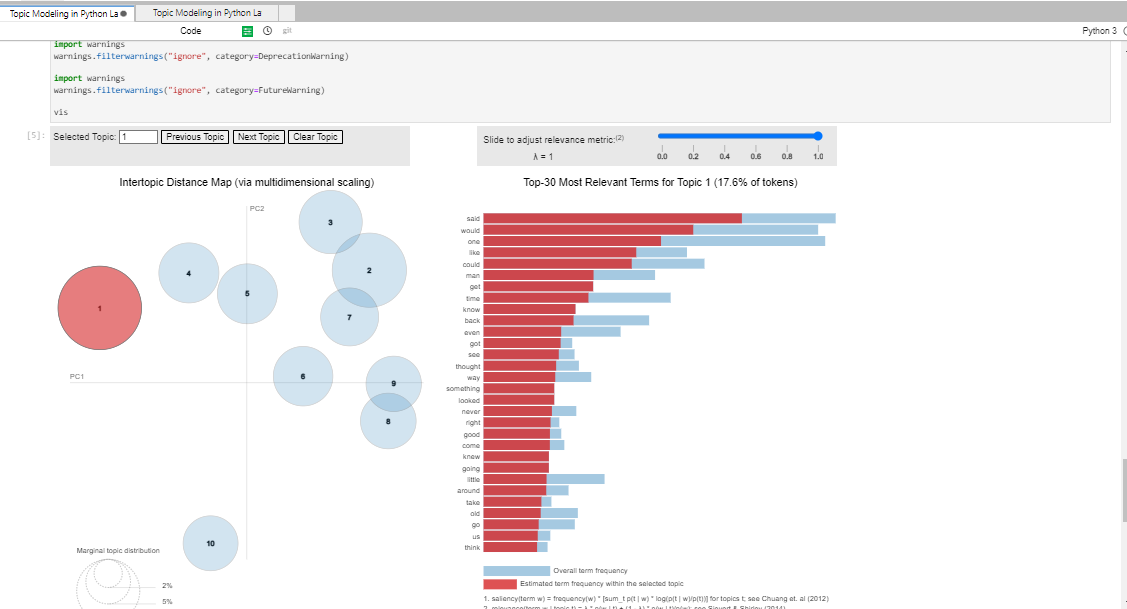

In [265]:
# Primeiro, precisamos importar os módulos necessários
import nltk
import gensim
from gensim import corpora
from nltk.corpus import brown

# Em seguida, precisamos baixar o corpus Brown
nltk.download('brown')

# Agora podemos acessar os documentos do corpus Brown
documents = brown.sents()

# Próximo, vamos pré-processar os documentos, removendo palavras com menos de três caracteres
# e removendo palavras comuns conhecidas como "stop words"
processed_docs = []
stopwords = nltk.corpus.stopwords.words('english')
for doc in documents:
    processed_docs.append([word for word in doc if word not in stopwords and len(word) > 3])

# Agora vamos criar um dicionário dos documentos pré-processados
dictionary = corpora.Dictionary(processed_docs)

# Em seguida, vamos criar uma matriz de termo de documento a partir dos documentos pré-processados
# e do dicionário criado acima
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Agora podemos criar o modelo LDA com o número desejado de tópicos
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

# Agora podemos calcular a medida de tópico separável de Mimno et al.
def mimno_measure(ldamodel, doc_term_matrix):
  topic_separability = 0
  for topic_id, topic in ldamodel.show_topics(num_topics=-1, formatted=False):
    term_probs = [prob for _, prob in topic]
    topic_separability += 1 - sum([prob**2 for prob in term_probs])
  return topic_separability / ldamodel.num_topics

print(mimno_measure(ldamodel, doc_term_matrix))


[nltk_data] Error loading brown: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


0.9987510008338812
